# P03: Point Processes

## Problem 1: Mean and variance of Gaussian random variable

Let us simulate the experiment of measuring a Gaussian random variable with $\mu=0$ and standard deviation $\sigma=1$. Each experiment is a draw from a standard normal.

(i) Simulate 10 repetitions of this experiment by drawing $n_{\mathrm{samp}}=10$ samples from this distribution.

(ii) Use `numpy` routines to estimate the mean and the variance of the samples. For the variance, use the trivial but biased estimator as well as the unbiased one.

In [1]:
import numpy as np
import matplotlib . pyplot as plt
import glob

params = {'axes.linewidth'  :  1.5,
          'xtick.labelsize' : 19,
          'ytick.labelsize' : 19,
          'legend.fontsize' : 19,
          'axes.labelsize'  : 25,
          'errorbar.capsize':  4,
          'figure.figsize'  : (16,7), # (16,9)
          'axes.grid'       : True,
          'grid.linewidth'  : 1}
plt.rcParams.update(params)

In [2]:
sample = np.random.normal(0,1,10)
mean   = np.mean(sample)

# biased and unbiased variance without np. routines
#biased_var   =  1/len(sample) * np.sum((sample-mean)**2)
#unbiased_var =  1/(len(sample)-1) * np.sum((sample-mean)**2)

# biased and unbiased variance using np. routines
biased_var   = np.var(sample, ddof = 0)
unbiased_var = np.var(sample, ddof = 1)

# check if both methods are identical
print(np.var(sample, ddof = 0) == 1/len(sample) * np.sum((sample-mean)**2))
print(np.var(sample, ddof = 0)  - 1/len(sample) * np.sum((sample-mean)**2))

print(np.var(sample, ddof = 1) == 1/(len(sample)-1) * np.sum((sample-mean)**2))
print(np.var(sample, ddof = 1)  - 1/(len(sample)-1) * np.sum((sample-mean)**2))

False
-2.220446049250313e-16
False
2.220446049250313e-16


## Problem 2: Distribution of sample mean

Write a function that repeats problem 1 $n$ times.

(i) Using these samples, investigate the distribution of the sample mean. How does it compare to your expectations? How do your conclusions change if you increase the sample size to $n_{\mathrm{samp}}=100$?

(ii) Using these samples, investigate the bias of the variance estimators. How does it compare to your expectations. How do your conclusions change if you increase the sample size to $n_{\mathrm{samp}}=100$?

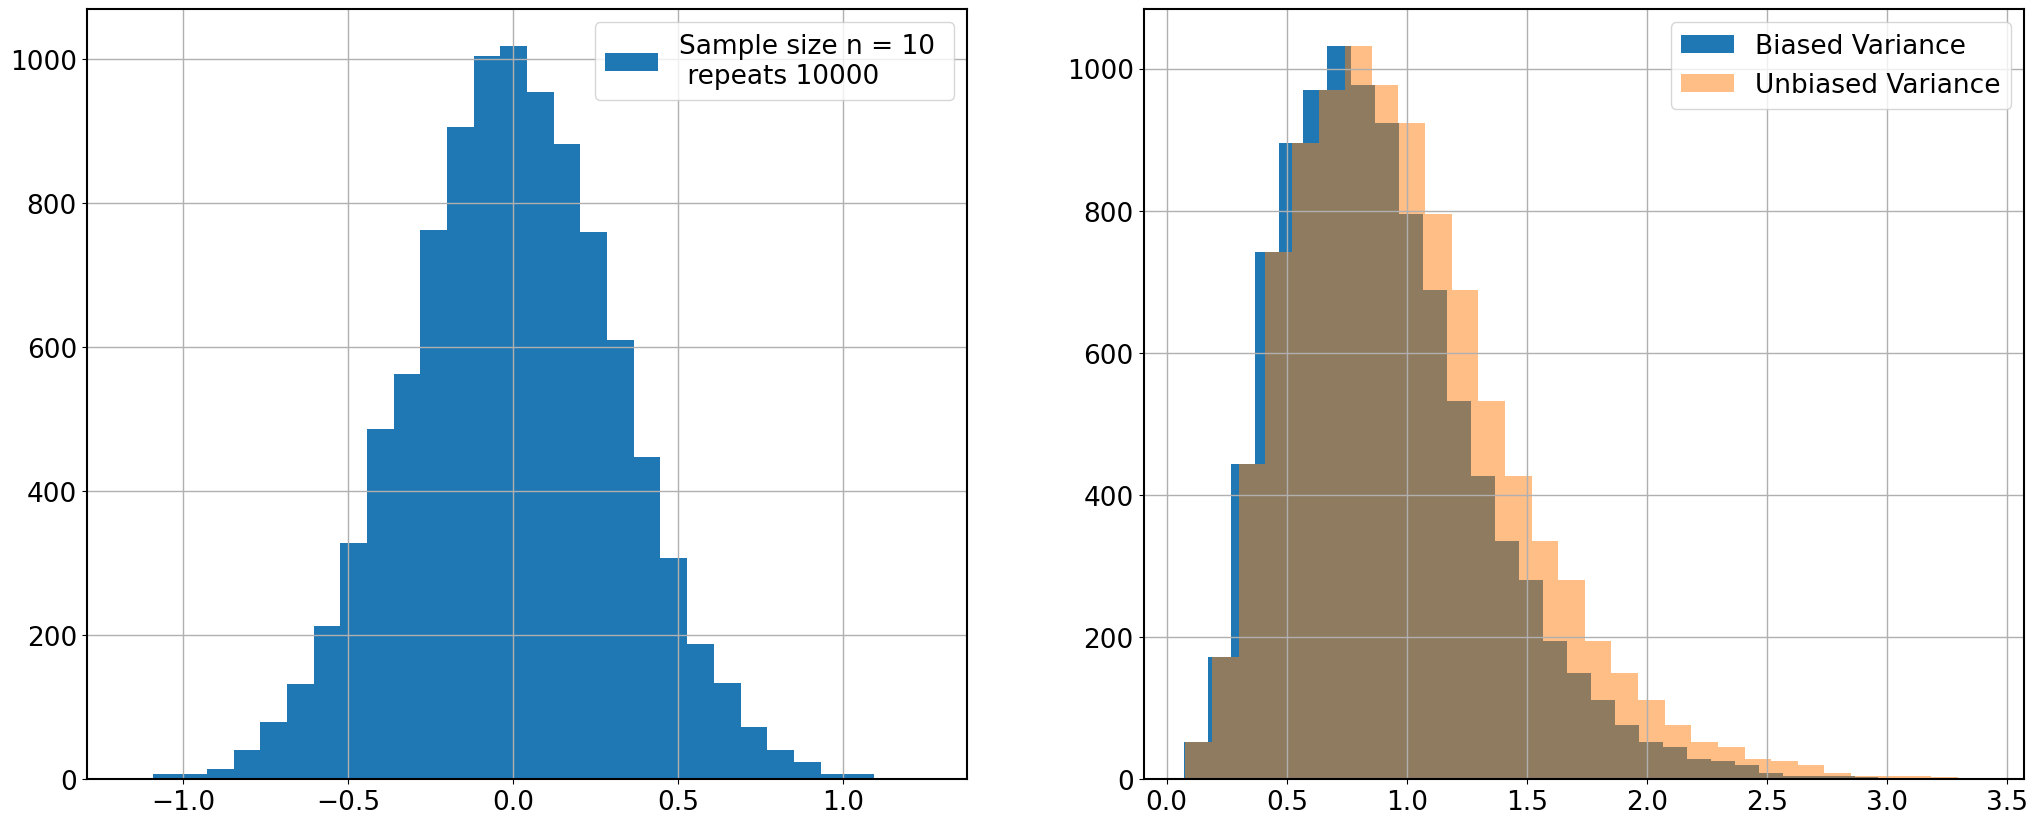

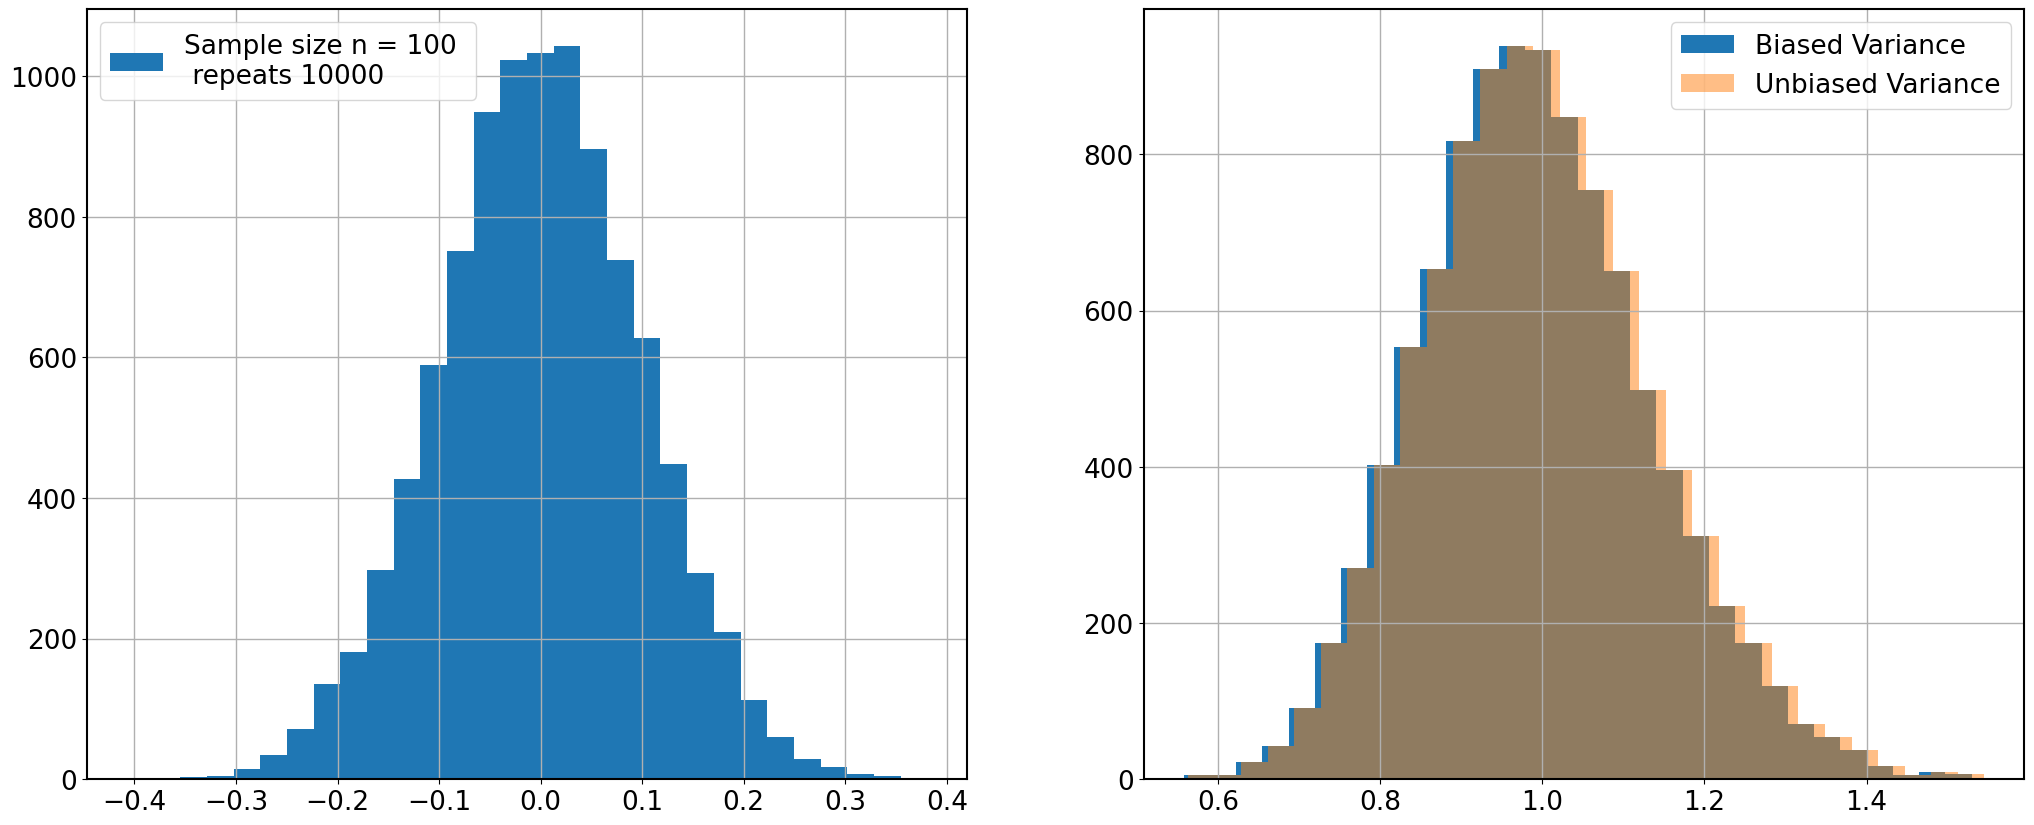

In [3]:
def takesample(n_repeats, n_sample = 10):
    mean         = np.zeros(n_repeats)
    biased_var   = np.zeros(n_repeats)
    unbiased_var = np.zeros(n_repeats)
    
    for i in range(n_repeats):
        sample          = np.random.normal(0,1,n_sample)
        mean[i]         = np.mean(sample)
        #biased_var[i]   =  1/n_sample * np.sum((sample-mean[i])**2)
        #unbiased_var[i] =  1/(n_sample-1) * np.sum((sample-mean[i])**2)
        biased_var[i]   = np.var(sample, ddof = 0)
        unbiased_var[i] = np.var(sample, ddof = 1)
    
    
    fig, ax = plt.subplots(1,2, figsize = (25,10))
    ax[0].hist(mean, bins = 30, label = f'Sample size n = {n_sample} \n repeats {n_repeats}')
    ax[0].legend()
    ax[1].hist(biased_var,   bins = 30, alpha = 1.0, label = 'Biased Variance') 
    ax[1].hist(unbiased_var, bins = 30, alpha = 0.5, label = 'Unbiased Variance')
    ax[1].legend()
    plt.show()


takesample(10000,10)
takesample(10000,100)

## Problem 3: Analyzing samples

Load `sample1.out` from the `data` directory into your notebook. Inspect the distribution of the sample by plotting a histogram. 

(i) Write a class that is able to estimate mean and variance as well as error on the mean and bias of the variance. Make the choice of the variance estimator an argument of the class' `__init__` function.

(ii) Use your class to estimate mean and variance of `sample1.out`. In addition, also estimate the median and plot them on top of your histogram.

(iii) Now also estimate the mean and variance of the remaining samples in the `data` directory. Are the samples consistent with being drawn from the same underlying distribution? If yes, investigate the distribution of the sample means and compare to your expectations.

Sample1 Mean: 0.6061677979776571
Sample1 Variance: 6.48232299513079
Sample1 Mean Error: 0.04900765150024046
Sample1 Bias Variance: 0.0024017499055686287
Sample1 Median: 1.857948895866691


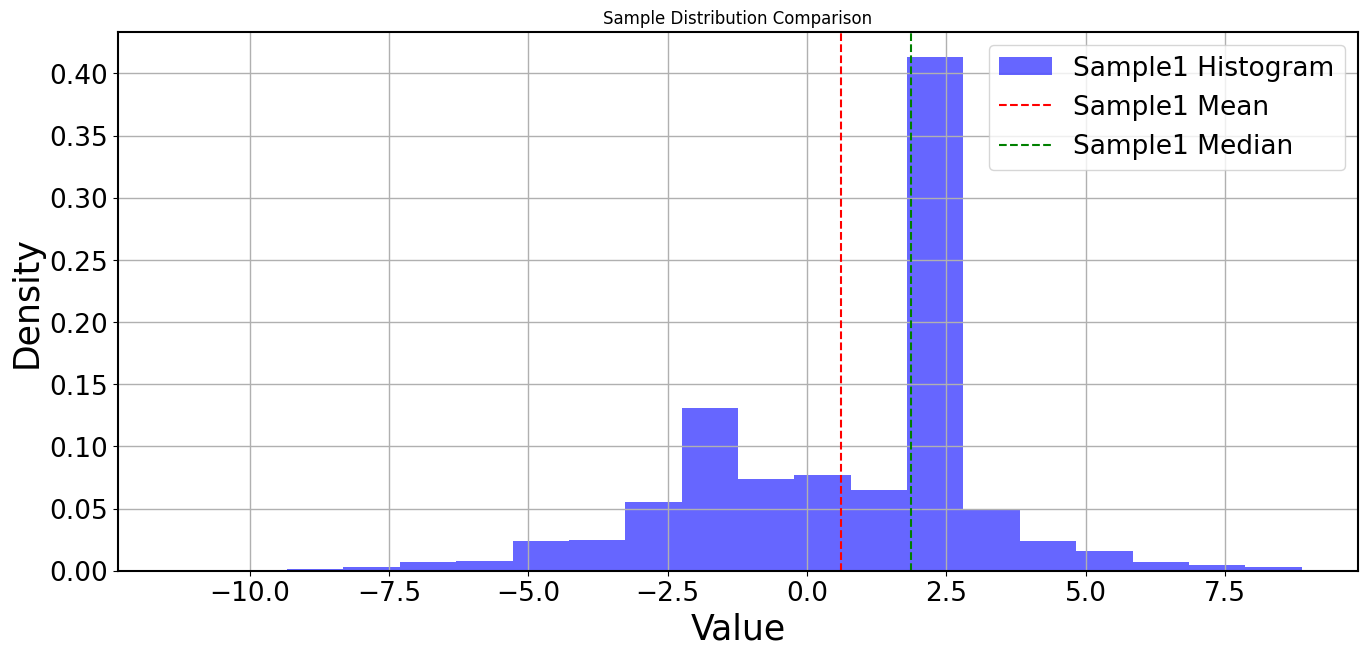


Sample Means of All Samples: [0.5910772920359088, 0.5719037347793242, 0.6085423919974559, 0.5340742944160791, 0.6168418321453177, 0.6312236091775314, 0.5861949487116259, 0.5909215358225047, 0.5769559388238201]
Sample Variances of All Samples: [6.624280839226434, 6.585812000853971, 6.286916411374847, 6.310535822064127, 6.260933087901898, 6.640581391140998, 6.737553450691853, 6.478968921372768, 6.0700457138673425]


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import os

class Estimator:
    def __init__(self, variance_estimator):
        self.variance_estimator = variance_estimator

    def estimate_mean_variance(self, data):
        mean = np.mean(data)
        variance = self.variance_estimator(data)
        mean_error = np.std(data, ddof=1) / np.sqrt(len(data))
        bias_variance = np.var(data, ddof=1) - variance
        return mean, variance, mean_error, bias_variance

def sample_variance(data):
    return np.var(data, ddof=0)

#Load sample1.out
data_directory = 'data'
filename = 'sample1.out'
file_path = os.path.join(data_directory, filename)
sample_data = np.loadtxt(file_path)

#Plot a histogram of the sample
plt.hist(sample_data, bins=20, density=True, alpha=0.6, color='b', label='Sample1 Histogram')

#Create an instance of the Estimator class with sample_variance as the variance estimator
estimator = Estimator(sample_variance)

#Estimate mean and variance of sample1
mean, variance, mean_error, bias_variance = estimator.estimate_mean_variance(sample_data)
median = np.median(sample_data)
print("Sample1 Mean:", mean)
print("Sample1 Variance:", variance)
print("Sample1 Mean Error:", mean_error)
print("Sample1 Bias Variance:", bias_variance)
print("Sample1 Median:", median)

#Estimate mean and variance of the remaining samples in the data directory
sample_means = []
sample_variances = []

for file_name in os.listdir(data_directory):
    if file_name != filename and file_name.endswith('.out'):
        file_path = os.path.join(data_directory, file_name)
        data = np.loadtxt(file_path)
        sample_mean, sample_variance,_,_ = estimator.estimate_mean_variance(data)
        sample_means.append(sample_mean)
        sample_variances.append(sample_variance)

#Compare sample means of sample1
plt.axvline(x=mean, color='r', linestyle='--', label='Sample1 Mean')
plt.axvline(x=median, color='g', linestyle='--', label='Sample1 Median')
plt.legend()
plt.title('Sample Distribution Comparison')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

#Compare the means and variances of all samples
print("\nSample Means of All Samples:", sample_means)
print("Sample Variances of All Samples:", sample_variances)

## Problem 4: The Poisson distribution

Let us assume we have a process in which the probability of a given event, $p$, is small but we perform a large number of trials $N$. We further assume that the so-called rate of this process (or mean number of ocurring events), $\lambda=Np$, is finite and constant. Then the probability of $k$ events occurring follows a Poisson distribution given by $$P(k|\lambda)=\frac{\lambda^k e^{-\lambda}}{k!}.$$ So the Poisson distribution describes the distributions of events, where each single one is rare but we perform a large number of trials in order to keep $\lambda$ constant. An example for this is the number of photons reaching a telescope.

One of the earliest application of Poisson processes was the probability of Prussian soldiers being kicked to death by horses. This problem was analyzed by Ladislaus Bortkiewicz in 1898. Analyzing 10 Prussian corps for 20 years he collected the following data:

| Number of deaths | Number of groups |
|:---| :--- |
| 0 | 109 |
| 1 | 65 |
| 2 | 22 |
| 3 | 3 |
| 4 | 1 |

(i) Plot the probability distribution of these data.

(ii) Compare to the theoretical prediction using Poisson statistics.

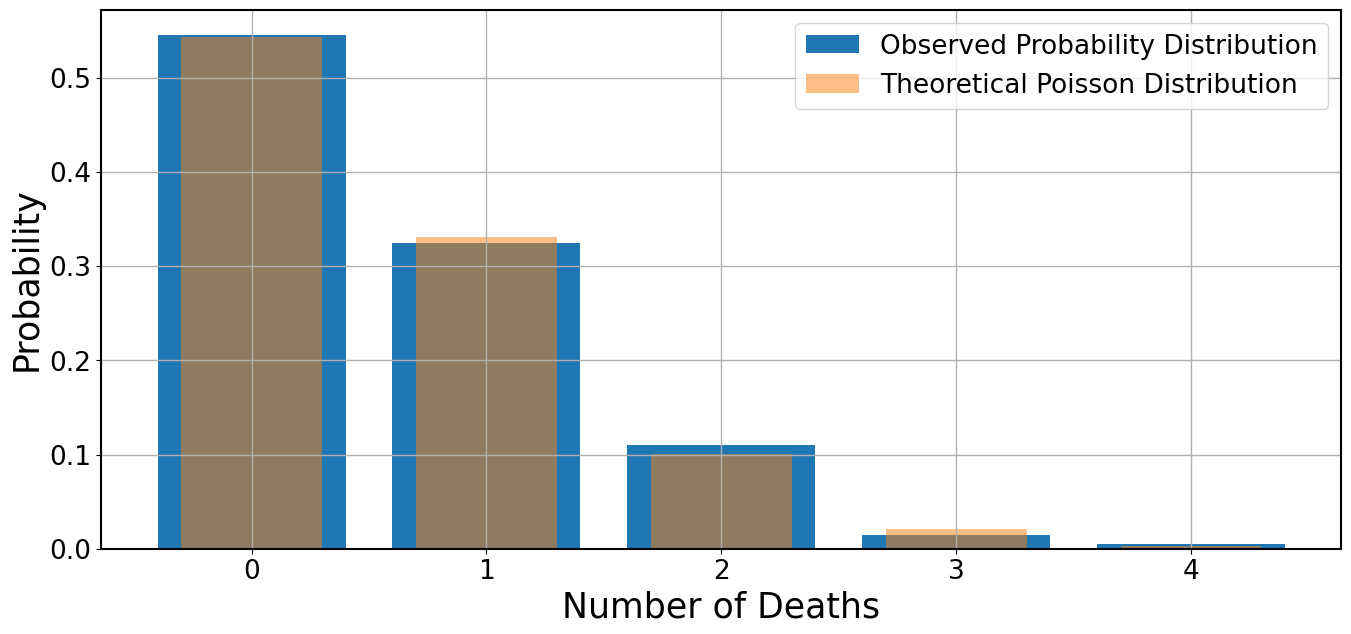

In [5]:
n_deaths = np.array([0,1,2,3,4])
n_groups = np.array([109,65,22,3,1])

n_groups_tot = np.sum(n_groups)

l = np.sum(n_deaths*n_groups)/n_groups_tot

def P(k,lam = l):
    return (l**k * np.exp(-l))/np.math.factorial(k)

poisson_dist = []
for death in n_deaths:
    prob = P(death)
    poisson_dist.append(prob)


plt.figure()
plt.bar(n_deaths,n_groups/np.sum(n_groups)  , label = 'Observed Probability Distribution')
plt.bar(n_deaths, poisson_dist, width = 0.6, alpha = 0.5, label = 'Theoretical Poisson Distribution')
plt.xlabel('Number of Deaths')
plt.ylabel('Probability')
plt.legend()
plt.show()

The theoretical prediction using poisson statistics is in good agreement with the observed distribution.